In [1]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

In [2]:
library('IOBR')

Loading required package: tibble

Warning message:
"package 'tibble' was built under R version 4.2.3"
Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:dbplyr':

    ident, sql


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Loading required package: survival

Warning message:
"package 'survival' was built under R version 4.2.3"
Loading required package: ComplexHeatmap

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite eit

In [3]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

Warning message:
"package 'openxlsx' was built under R version 4.2.3"


In [4]:
head(data,2)

,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [5]:
data = data[!duplicated(data$Gene_name),]

In [6]:
expr = data %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'Gene_name') 
Group = c(rep('con',31),rep('CI',43))

In [7]:
library(IOBR)

In [8]:
head(expr,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,7.70851,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,20.41526,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [9]:
expr_coad <- log2(expr+0.1)
expr_coad = expr
#expr_coad <- expr_coad[apply(expr_coad,1,sd)>0.5,]

In [10]:
tme_deconvolution_methods

MCPcounter               EPIC              xCell          CIBERSORT 
      "mcpcounter"             "epic"            "xcell"        "cibersort" 
CIBERSORT Absolute                IPS           ESTIMATE                SVR 
   "cibersort_abs"              "ips"         "estimate"              "svr" 
              lsei              TIMER          quanTIseq 
            "lsei"            "timer"        "quantiseq"

In [11]:
dim(expr_coad)

[1] 30983    74

In [12]:
# im_ssgsea <- deconvo_tme(eset = expr_coad,
#                         method = "cibersort",
#                         arrays = F
#                         )
# save(im_ssgsea,file = 'cibersort.rda')
# acp = im_ssgsea[2:dim(im_ssgsea)[2]]
# acp = acp[,which(colSums(acp) > 0)]
# cc = cbind(im_ssgsea$ID,acp)
# colnames(cc)[1] = 'ID'
# im_ssgsea = cc

In [13]:
library(dplyr)

In [14]:
library(tidyverse)

cellMarker <- read.csv("/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data/cellmarker.txt", header = F, sep = "\t") # 用EXCEL打开删除NA列
cellMarker <- cellMarker %>% column_to_rownames("V1") %>% t()

a <- cellMarker
a <- a[1:nrow(a), ]
set <- colnames(a)
geneSet <- list()
# 
for (i in set) {
  x <-  as.character(a[,i])
  x <- x[nchar(x)!=0]
  x <-  as.character(x)
  geneSet[[i]] <-x
}

im_ssgsea <- calculate_sig_score(eset = expr_coad, signature = geneSet , method = "ssgsea")


>>> Calculating signature score using ssGSEA method

>>> log2 transformation is not necessary

i GSVA version 2.0.0

! 2000 genes with constant values throughout the samples

! Genes with constant values are discarded

i Calculating GSVA ranks

i GSVA dense (classical) algorithm

i Row-wise ECDF estimation with Gaussian kernels

i Calculating GSVA column ranks

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
i Calculating GSVA scores

v Calculations finished



In [15]:
ssgeea = im_ssgsea

In [16]:
ssgeea = ssgeea %>%  tibble::column_to_rownames(.,'ID') %>% t() 

In [17]:
ssgeea = ssgeea[which(rowSums(ssgeea) > 0),]

In [18]:
im_ssgsea$group <- Group # 

In [19]:
head(im_ssgsea,2)

ID,Activated CD8 T cell,Central memory CD8 T cell,Effector memeory CD8 T cell,Activated CD4 T cell,Central memory CD4 T cell,Effector memeory CD4 T cell,T follicular helper cell,Gamma delta T cell,Type 1 T helper cell,...,Natural killer T cell,Activated dendritic cell,Plasmacytoid dendritic cell,Immature dendritic cell,Macrophage,Eosinophil,Mast cell,Monocyte,Neutrophil,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C1,0.02149423,-0.06630452,0.3324026,-0.16908143,-0.3208406,0.08106452,0.3462014,-0.05299233,0.01558489,...,0.1730835,-0.0177508,-0.2536989,0.24733121,-0.1347524,-0.2858127,0.30187988,-0.225778945,-0.5667798,con
C10,0.09912408,-0.17874072,-0.3264152,-0.08482711,-0.1717477,-0.20535607,-0.1418711,-0.43367185,-0.17452753,...,-0.2419695,-0.3012379,-0.1669050,0.08531357,-0.4004308,-0.5461643,0.02461911,0.004955834,-0.7751564,con


### 堆积图

In [20]:
library(tidyHeatmap)
library(tidyverse)
library(RColorBrewer)

In [21]:
im_ssgsea2 = im_ssgsea %>% dplyr::select(-group)   #%>%  tibble::column_to_rownames(.,'ID')

In [22]:
im_ssgsea3 = im_ssgsea2 %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'ID')

In [23]:
head(im_ssgsea3,2)

,Activated CD8 T cell,Central memory CD8 T cell,Effector memeory CD8 T cell,Activated CD4 T cell,Central memory CD4 T cell,Effector memeory CD4 T cell,T follicular helper cell,Gamma delta T cell,Type 1 T helper cell,Type 17 T helper cell,...,Myeloid derived suppressor cell,Natural killer T cell,Activated dendritic cell,Plasmacytoid dendritic cell,Immature dendritic cell,Macrophage,Eosinophil,Mast cell,Monocyte,Neutrophil
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,0.02149423,-0.06630452,0.3324026,-0.16908143,-0.3208406,0.08106452,0.3462014,-0.05299233,0.01558489,0.07176491,...,-0.1933065,0.1730835,-0.0177508,-0.2536989,0.24733121,-0.1347524,-0.2858127,0.30187988,-0.225778945,-0.5667798
C10,0.09912408,-0.17874072,-0.3264152,-0.08482711,-0.1717477,-0.20535607,-0.1418711,-0.43367185,-0.17452753,-0.14025197,...,-0.3936035,-0.2419695,-0.3012379,-0.1669050,0.08531357,-0.4004308,-0.5461643,0.02461911,0.004955834,-0.7751564


In [24]:
expr = expr[,rownames(im_ssgsea3)] %>%t() %>% as.data.frame()

In [25]:
head(expr,2)

,ZZZ3,ZZEF1,ZYX,ZYG11B,ZYG11A,ZXDC,ZXDB,ZXDA,ZWINT,ZWILCH,...,45361,45360,45359,45358,45357,45356,45355,45354,45353,45352
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,8.721792,16.69823,57.74959,7.905651,0.01081235,15.59089,2.511553,1.414145,0.4268559,1.478138,...,0.11347253,8.655285,53.35918,49.72285,22.60970,3.802105,0,1.95016,26.61335,16.72454
C10,9.694104,18.51593,79.97592,7.409261,0.03306296,16.78477,1.972772,1.709837,0.7396575,1.805693,...,0.01051474,7.091424,157.70970,40.73440,22.06025,4.244032,0,1.54828,42.81473,10.33062


In [26]:
expr = expr[,c('FAM200B','BCL2A1','IGJ','TXN')]

In [27]:
library(linkET)


Attaching package: 'linkET'


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:clusterProfiler':

    simplify


The following object is masked from 'package:ComplexHeatmap':

    anno_link




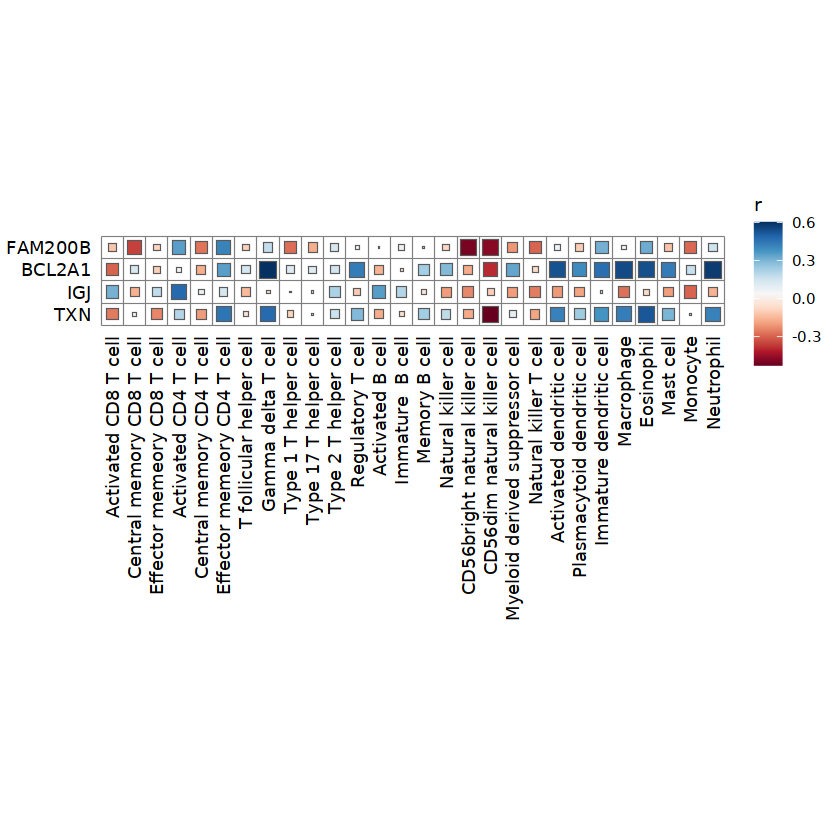

In [28]:
cor_res <- correlate(expr, im_ssgsea3,method = "spearman")
  
qcorrplot(cor_res) +
  geom_square() +
  scale_fill_gradientn(colours = RColorBrewer::brewer.pal(11, "RdBu"))

In [29]:
options(repr.plot.width = 12,repr.plot.height = 4)

In [30]:
# 
df_r <- cor_res$r %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") %>% 
  pivot_longer(-1,names_to = "cell_type",values_to = "correlation")

df_p <- cor_res$p %>% 
  as.data.frame() %>% 
  rownames_to_column(var = "gene") %>% 
  pivot_longer(-1,names_to = "cell_type",values_to = "pvalue")

df_cor <- df_r %>% 
  left_join(df_p) %>% 
  mutate(stars = cut(pvalue,breaks = c(-Inf,0.05,0.01,0.001,Inf),right = F,labels = c("***","**","*"," ")))
## Joining with `by = join_by(gene, cell_type)`




Joining with `by = join_by(gene, cell_type)`


In [31]:
head(df_cor)

gene,cell_type,correlation,pvalue,stars
<chr>,<chr>,<dbl>,<dbl>,<fct>
FAM200B,Activated CD8 T cell,-0.12082932,0.3044227996,
FAM200B,Central memory CD8 T cell,-0.35680118,0.0019174500,**
FAM200B,Effector memeory CD8 T cell,-0.08913736,0.4492659429,
FAM200B,Activated CD4 T cell,0.35105516,0.0022876633,**
FAM200B,Central memory CD4 T cell,-0.26992966,0.0202981586,*
FAM200B,Effector memeory CD4 T cell,0.41660126,0.0002522183,***


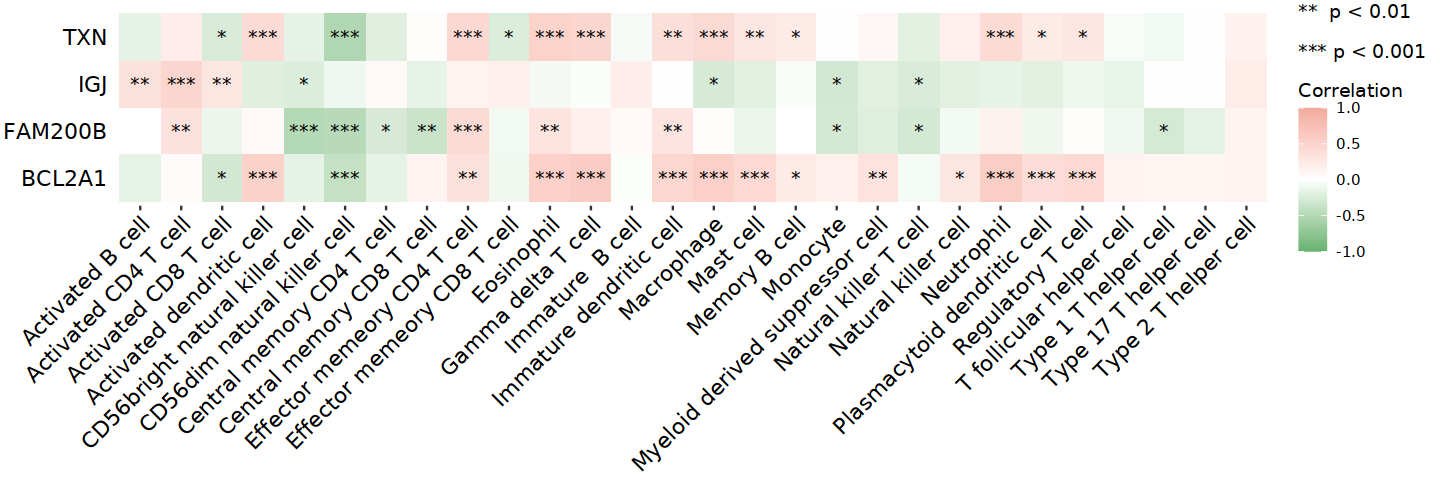

In [34]:
library(ggplot2)

ggplot(df_cor, aes(cell_type,gene))+
  geom_tile(aes(fill=correlation))+
  geom_text(aes(label=stars), color="black", size=4)+
  scale_fill_gradient2(low='#67B26F', high='#F2AA9D',mid = 'white',
                      limit=c(-1,1),name=paste0("*    p < 0.05","\n\n","**  p < 0.01","\n\n","*** p < 0.001","\n\n","Correlation"))+
  labs(x=NULL,y=NULL)+
  theme(axis.text.x = element_text(size=13,angle = 45,hjust = 1,color = "black"),
        axis.text.y = element_text(size=13,color = "black"),
        axis.ticks.y = element_blank(),
        panel.background=element_blank())

In [49]:
for (i in colnames(expr)){

    # 
df_egfr <- df_cor %>% 
  filter(gene==i) %>% dplyr::select(cell_type,correlation,pvalue)
colnames(df_egfr)[c(1,2)]= c('Cell','cor')
data = df_egfr
colnames(data)
p.col = c('gold','pink','orange','LimeGreen','darkgreen')
fcolor = function(x,p.col){
  color = ifelse(x>0.8,p.col[1],ifelse(x>0.6,p.col[2],ifelse(x>0.4,p.col[3],
                ifelse(x>0.2,p.col[4], p.col[5])
                )))
  return(color)
}

p.cex = seq(2.5, 5.5, length=5)
fcex = function(x){
  x=abs(x)
  cex = ifelse(x<0.1,p.cex[1],ifelse(x<0.2,p.cex[2],ifelse(x<0.3,p.cex[3],
              ifelse(x<0.4,p.cex[4],p.cex[5]))))
  return(cex)
}
points.color = fcolor(x=data$pvalue,p.col=p.col)
data$points.color = points.color
points.cex = fcex(x=data$cor)
data$points.cex = points.cex
data=data[order(data$cor),]

xlim = ceiling(max(abs(data$cor))*10)/10
pdf(file=paste0('./fig.re/',i,".pdf"), width=9, height=7)
layout(mat=matrix(c(1,1,1,1,1,0,2,0,3,0),nc=2),width=c(8,2.2),heights=c(1,2,1,2,1))
par(bg="white",las=1,mar=c(5,18,2,4),cex.axis=1.5,cex.lab=2)
plot(1,type="n",xlim=c(-xlim,xlim),ylim=c(0.5,nrow(data)+0.5),xlab="Correlation Coefficient",ylab="",yaxt="n",yaxs="i",axes=F)
rect(par('usr')[1],par('usr')[3],par('usr')[2],par('usr')[4],col="#F5F5F5",border="#F5F5F5")
grid(ny=nrow(data),col="white",lty=1,lwd=2)
#
segments(x0=data$cor,y0=1:nrow(data),x1=0,y1=1:nrow(data),lwd=4)
#
points(x=data$cor,y = 1:nrow(data),col = data$points.color,pch=16,cex=data$points.cex)
#
text(par('usr')[1],1:nrow(data),data$Cell,adj=1,xpd=T,cex=1.5)

pvalue.text=ifelse(data$pvalue<0.001,'<0.001',sprintf("%.03f",data$pvalue))
redcutoff_cor=0
redcutoff_pvalue=0.05
text(par('usr')[2],1:nrow(data),pvalue.text,adj=0,xpd=T,col=ifelse(abs(data$cor)>redcutoff_cor & data$pvalue<redcutoff_pvalue,"red","black"),cex=1.5)
axis(1,tick=F)
par(mar=c(0,4,3,4))
plot(1,type="n",axes=F,xlab="",ylab="")
legend("left",legend=c(0.1,0.2,0.3,0.4,0.5),col="black",pt.cex=p.cex,pch=16,bty="n",cex=2,title="abs(cor)")

#
par(mar=c(0,6,4,6),cex.axis=1.5,cex.main=2)
barplot(rep(1,5),horiz=T,space=0,border=NA,col=p.col,xaxt="n",yaxt="n",xlab="",ylab="",main="pvalue")
axis(4,at=0:5,c(1,0.8,0.6,0.4,0.2,0),tick=F)
dev.off()
    
}

In [50]:
head(im_ssgsea3,2)

,Activated CD8 T cell,Central memory CD8 T cell,Effector memeory CD8 T cell,Activated CD4 T cell,Central memory CD4 T cell,Effector memeory CD4 T cell,T follicular helper cell,Gamma delta T cell,Type 1 T helper cell,Type 17 T helper cell,...,Myeloid derived suppressor cell,Natural killer T cell,Activated dendritic cell,Plasmacytoid dendritic cell,Immature dendritic cell,Macrophage,Eosinophil,Mast cell,Monocyte,Neutrophil
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,0.02149423,-0.06630452,0.3324026,-0.16908143,-0.3208406,0.08106452,0.3462014,-0.05299233,0.01558489,0.07176491,...,-0.1933065,0.1730835,-0.0177508,-0.2536989,0.24733121,-0.1347524,-0.2858127,0.30187988,-0.225778945,-0.5667798
C10,0.09912408,-0.17874072,-0.3264152,-0.08482711,-0.1717477,-0.20535607,-0.1418711,-0.43367185,-0.17452753,-0.14025197,...,-0.3936035,-0.2419695,-0.3012379,-0.1669050,0.08531357,-0.4004308,-0.5461643,0.02461911,0.004955834,-0.7751564


In [51]:
cor<- cor(im_ssgsea3)

In [52]:
library(corrplot)

corrplot 0.95 loaded



In [53]:
col2 <- colorRampPalette(c("#233151","white" ,"#F12F07"),alpha = TRUE)

In [54]:
# corrplot(cor, order = "hclust", addgrid.col = "grey70",type = "upper",
# outline = "orange",col = col2(100),method = "square",diag = F)

In [55]:
res1 <- cor.mtest(im_ssgsea3, conf.level = .95)
res2 <- cor.mtest(im_ssgsea3, conf.level = .99)
p.mat = res1$p
p.mat[1:5,1:5]

,Activated CD8 T cell,Central memory CD8 T cell,Effector memeory CD8 T cell,Activated CD4 T cell,Central memory CD4 T cell
Activated CD8 T cell,0.0000000000,0.057286962,0.0001792459,0.007929125,0.0004666429
Central memory CD8 T cell,0.0572869617,0.000000000,0.7933284611,0.001884543,0.0134260877
Effector memeory CD8 T cell,0.0001792459,0.793328461,0.0000000000,0.863719119,0.0015073360
Activated CD4 T cell,0.0079291251,0.001884543,0.8637191195,0.000000000,0.0644028328
Central memory CD4 T cell,0.0004666429,0.013426088,0.0015073360,0.064402833,0.0000000000


In [56]:
options(repr.plot.width = 12,repr.plot.height = 12)

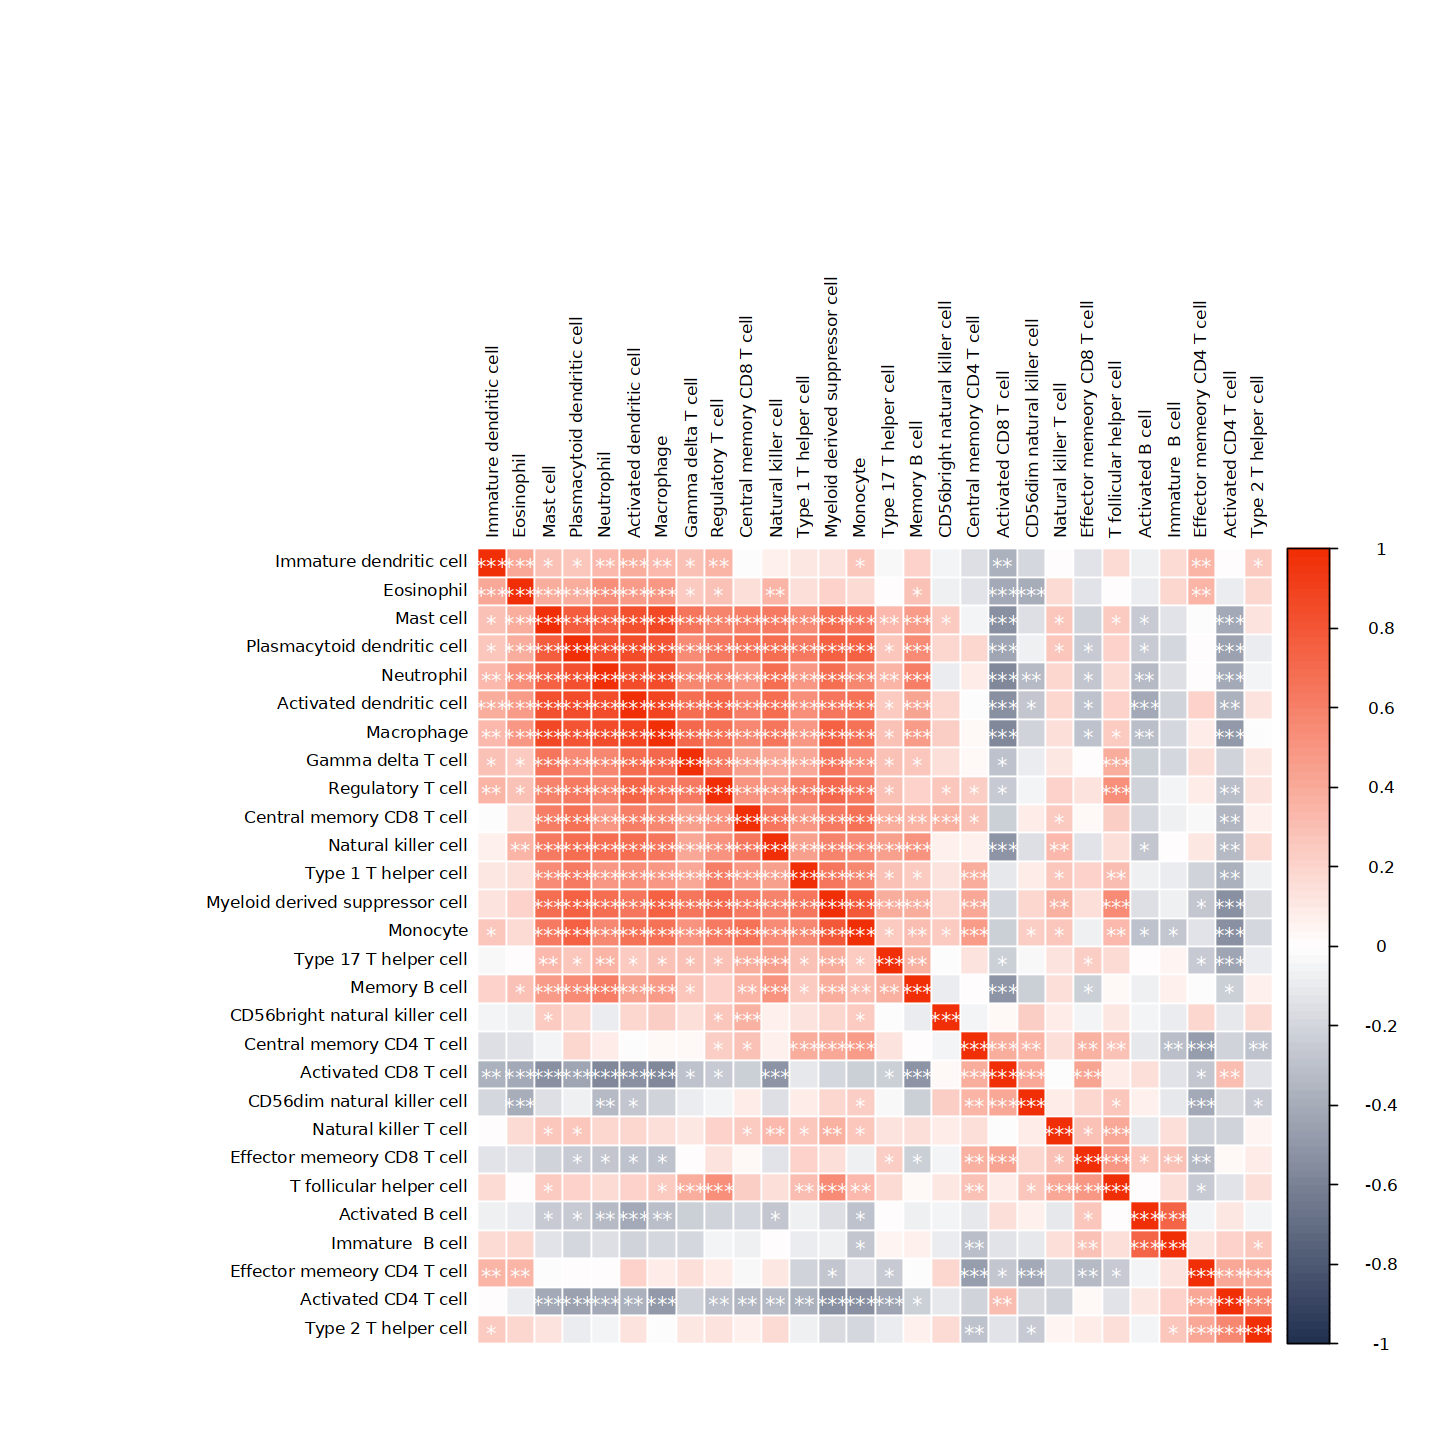

In [57]:
corrplot(cor, order = "hclust",col = col2(100),method = "color",
tl.col="black",tl.cex = 0.8,cl.pos = "r",cl.ratio = 0.2,
p.mat = res1$p, sig.level = c(.001, .01, .05),outline="white",
insig = "label_sig",pch.cex = 1, pch.col = "white")